In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ast # to convert strings to a list

## Functions for Cleaning Data

In [2]:
def load_data(filename):
    return pd.read_csv(filename)

def str_to_list(str_list):
    try: 
        lst = ast.literal_eval(str_list)
    except ValueError as ve:
        # print(ve)
        lst = []
    return lst

def get_avg_sim(scores):
    try:
        avg = sum(scores)/len(scores)
    except ZeroDivisionError as zde:
        # print(f'Error: {zde}')
        avg = None
    return avg

def get_max_score(scores):
    try:
        max_score = max(scores)
    except ValueError as ve:
        # print(ve)
        max_score = None
    return max_score


def transform_df(df):
    # convert 'similarities' and 'cos_sim_scores' to list
    df['similarities_lst'] = df['similarities'].apply(str_to_list)
    df['cos_sim_scores_lst'] = df['cos_sim_scores'].apply(str_to_list)
    
    
    # add columns 
    df['avg_sim'] = df['cos_sim_scores_lst'].apply(get_avg_sim)
    df['max_score'] = df['cos_sim_scores_lst'].apply(get_max_score)
    df['num_headlines'] = df['nyt_headlines'].apply(len)
    
    # remove na vals
    clean = df.dropna()
    
    # remove duplicate rows
    clean_no_dup = clean.drop_duplicates(subset=['video_id','date'])
    
    sorted_df = clean_no_dup.sort_values(by='max_score',ascending=False)
    
    return sorted_df


## Exploring Data

In [3]:
def explore_data(df):
    unique_vids = df['video_id'].unique()
    print(f'Total Number of Rows: {len(df)}')
    print(f'Number of Unique Videos: {len(unique_vids)}')
    
    duplicates = df[df.duplicated(subset=['video_id', 'date'], keep=False)]
    num_duplicates = len(duplicates['video_id'])
    print(f'\nNumber of Duplicates Rows (with same id and same date): {num_duplicates}')
    
    print('\nDuplicate Videos and Counts:')
    print(duplicates[['video_id','date']].value_counts())
    
    print("\nAfter cleaning data...")
    
    df_clean = transform_df(df)
    print(f'\nOriginal Shape: {df.shape}')
    print(f'New Shape: {df_clean.shape}')
    print(f'Num rows dropped: {df.shape[0]-df_clean.shape[0]}')
    
    max_sim_score_stats = df_clean['max_score'].describe()
    print(f'\nAverage of Max Similartiy Stats:\n {max_sim_score_stats}')

In [4]:
filename = "cosine_sim_video_description_12345.csv"
data = load_data(filename)
explore_data(data)

Total Number of Rows: 381
Number of Unique Videos: 352

Number of Duplicates Rows (with same id and same date): 37

Duplicate Videos and Counts:
video_id             date      
7337716616479788331  2024-02-20    9
7201164179913329925  2023-02-17    4
7273349612067360006  2023-08-31    4
7217004941930499333  2023-04-01    4
7307016321995377966  2023-11-29    4
7338131827300846890  2024-02-21    4
7338586099721309471  2024-02-22    4
7338633087150181678  2024-02-22    4
Name: count, dtype: int64

After cleaning data...

Original Shape: (381, 12)
New Shape: (324, 12)
Num rows dropped: 57

Average of Max Similartiy Stats:
 count    324.000000
mean       0.376485
std        0.110423
min        0.134800
25%        0.288700
50%        0.365100
75%        0.447200
max        0.712700
Name: max_score, dtype: float64


In [5]:
df = transform_df(data)
df

Unnamed: 0             video_id        date  \
49           49  7338586099721309471  2024-02-22   
261         261  7310306395105037598  2023-12-08   
212         212  7313552261983030571  2023-12-17   
265         265  7310008911069744430  2023-12-07   
327         327  7280664387419999530  2023-09-19   
..          ...                  ...         ...   
86           86  7334472260830465322  2024-02-11   
325         325  7280714785543458094  2023-09-19   
6             6  7340363649212550405  2024-02-27   
240         240  7313353147525745922  2023-12-16   
103         103  7329579143643942174  2024-01-29   

                                     video_description  \
49   Wendy Williams, 59, has been diagnosed with pr...   
261  Honestly though loved the movie #saltburn #osc...   
212  The Tanis Site (repost) #sciencetok #science #...   
265  Replying to @Arum Natzorkhang The Toaster proj...   
327  #stitch with @QBSkiiii Let’s talk about the CO...   
..                                                 ...   
86   This will happen #taylorswift #traviskelce #nf...   
325  guilty as charged #sirens #college #elevator #...   
6    Now I cant sleep #alexanderthegreat #genhiskha...   
240  Surely this will have no long term consequence...   
103  When missing children realize they’ve been fou...   

                                          similarities  \
49   [(0.7127, 'Wendy Williams Has Frontotemporal D...   
261  [(0.7071, 'The Weekender'), (0.6547, 'The New ...   
212  [(0.6708, 'The Mostest for the Hostess: The Jo...   
265  [(0.6708, 'The Latest Challenge to the Voting ...   
327  [(0.6455, 'Enough About the Serial Killer. Let...   
..                                                 ...   
86   [(0.189, 'What MAGA Influencers Are Missing Ab...   
325  [(0.1768, 'Ukraine’s Counteroffensive Looms La...   
6    [(0.1741, 'Why the N.Y. Fire Dept. Canceled It...   
240  [(0.1581, 'Flashback: Your Weekly History Quiz...   
103  [(0.1348, 'The Lessons of the Crime Wave That ...   

                                        cos_sim_scores  \
49   [0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...   
261  [0.7071, 0.6547, 0.603, 0.5774, 0.5774, 0.5345...   
212  [0.6708, 0.603, 0.5774, 0.378, 0.378, 0.378, 0...   
265  [0.6708, 0.6124, 0.5345, 0.5, 0.4714, 0.4629, ...   
327  [0.6455, 0.3162, 0.3162, 0.2981, 0.2828, 0.258...   
..                                                 ...   
86   [0.189, 0.1768, 0.1667, 0.1581, 0.1508, 0.1443...   
325  [0.1768, 0.1667, 0.1667, 0.1581, 0.1443, 0.138...   
6    [0.1741, 0.1543, 0.1443, 0.14, 0.0, 0.0, 0.0, ...   
240  [0.1581, 0.1491, 0.1414, 0.1414, 0.1414, 0.134...   
103  [0.1348, 0.1348, 0.1291, 0.124, 0.1195, 0.1195...   

                                         nyt_headlines  \
49   ['Wendy Williams Has Frontotemporal Dementia a...   
261  ['The Weekender', 'The New World Bank Leader H...   
212  ['The Mostest for the Hostess: The Joy of Vint...   
265  ['The Latest Challenge to the Voting Rights Ac...   
327  ['Enough About the Serial Killer. Let’s Talk A...   
..                                                 ...   
86   ['What MAGA Influencers Are Missing About Foot...   
325  ['Ukraine’s Counteroffensive Looms Large as Ze...   
6    ['Why the N.Y. Fire Dept. Canceled Its Black H...   
240  ['Flashback: Your Weekly History Quiz, Decembe...   
103  ['The Lessons of the Crime Wave That Didn’t Ha...   

                                      similarities_lst  \
49   [(0.7127, Wendy Williams Has Frontotemporal De...   
261  [(0.7071, The Weekender), (0.6547, The New Wor...   
212  [(0.6708, The Mostest for the Hostess: The Joy...   
265  [(0.6708, The Latest Challenge to the Voting R...   
327  [(0.6455, Enough About the Serial Killer. Let’...   
..                                                 ...   
86   [(0.189, What MAGA Influencers Are Missing Abo...   
325  [(0.1768, Ukraine’s Counteroffensive Looms Lar...   
6    [(0.1741, Why the N.Y. Fire Dept. Canceled Its...   
240  [(0.158

## Visualize the Data

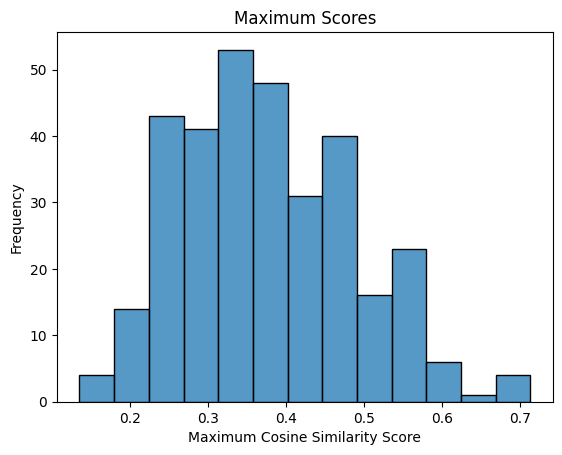

In [7]:
# Histogram of the maximum cosine similarity scores
def histogram(df,feature,xlab,title):
    hist = sns.histplot(df[feature])
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel('Frequency')

h = histogram(df, 'max_score','Maximum Cosine Similarity Score','Maximum Scores')

In [13]:
# Find top 5 videos with highest average scores
def get_top5(df, feature):
    top5 = df.iloc[:5]
    for index, row in top5.iterrows():
        print(f"\nVideo ID: {row['video_id']}")
        print(f"\nVideo\'s {feature}: {row[feature]}")
        print(f"\nDate watched: {row['date']}")
        print(f"\nTop 5 similarities:")
#         print(row['similarities_lst'][:5])
        for sim in row['similarities_lst'][:5]:
            print(sim)
            
top5 = get_top5(df,'video_description')


Video ID: 7338586099721309471

Video's video_description: Wendy Williams, 59, has been diagnosed with primary progressive #aphasia and frontotemporal #dementia. The conditions affect language, communication behavior and function. #news #health #wendywilliams 

Date watched: 2024-02-22

Top 5 similarities:
(0.7127, 'Wendy Williams Has Frontotemporal Dementia and Aphasia, Representatives Say')
(0.3571, 'On the Road With ‘The Outsiders,’ Where the Greasers and Socs Rumbled')
(0.303, 'The Best Bakeries Embrace Sweet and Savory')
(0.2835, 'Navalny and the Mirage of a Different Russia')
(0.2535, 'What to Know About the HPV Vaccine and Cancer Prevention')

Video ID: 7310306395105037598

Video's video_description: Honestly though loved the movie #saltburn #oscars #barrykeoghan #filmtok #movie 

Date watched: 2023-12-08

Top 5 similarities:
(0.7071, 'The Weekender')
(0.6547, 'The New World Bank Leader Has the Climate Crisis at the Top of His Agenda')
(0.603, 'Berlin’s Subway Musical Captures t

In [ ]:
# Create a heatmap of the top 5 videos and 5 sentences


In [ ]:
#
def complete_analysis(filename):
    df = load_data(filename)
    df_clean = clean_df(df)

## Testing Functions

In [105]:
copy = df.copy()
print(copy.dtypes)
print(copy.shape)
copy.head(3)

Unnamed: 0            int64
video_id              int64
date                 object
video_description    object
similarities         object
cos_sim_scores       object
nyt_headlines        object
dtype: object
(381, 7)


Unnamed: 0             video_id        date  \
0           0  7343058460025703722  2024-03-05   
1           1  7340809195807132971  2024-02-28   
2           2  7341877699629108523  2024-03-02   

                                   video_description  \
0  NBC News and MSNBC Correspondent Shaquille Bre...   
1  #greenscreen #greenscreenvideo Rebecca Ferguso...   
2  TEXAS THO😬👎🏼 #states #50statessong #50niftyuni...   

                                        similarities  \
0  [(0.4616, 'The Lindbergh Baby Kidnapping: A Gr...   
1  [(0.239, 'Alabama Republicans Scramble in an E...   
2  [(0.2673, '‘Pretty Sickening’: Texas Ranchers ...   

                                      cos_sim_scores  \
0  [0.4616, 0.3967, 0.3696, 0.3659, 0.3474, 0.338...   
1  [0.239, 0.169, 0.169, 0.169, 0.169, 0.169, 0.1...   
2  [0.2673, 0.25, 0.2357, 0.2132, 0.2041, 0.0, 0....   

                                       nyt_headlines  
0  ['The Lindbergh Baby Kidnapping: A Grisly Theo...  
1  ['Alabama Republicans Scramble in an Effort to...  
2  ['‘Pretty Sickening’: Texas Ranchers Face Crip...

In [106]:
clean_copy = clean_df(copy)
clean_copy.head()

Original Shape: (381, 11)
New Shape: (353, 11)
Num rows dropped: 28


Unnamed: 0             video_id        date  \
58           58  7338586099721309471  2024-02-22   
59           59  7338586099721309471  2024-02-22   
50           50  7338586099721309471  2024-02-22   
49           49  7338586099721309471  2024-02-22   
261         261  7310306395105037598  2023-12-08   

                                     video_description  \
58   Wendy Williams, 59, has been diagnosed with pr...   
59   Wendy Williams, 59, has been diagnosed with pr...   
50   Wendy Williams, 59, has been diagnosed with pr...   
49   Wendy Williams, 59, has been diagnosed with pr...   
261  Honestly though loved the movie #saltburn #osc...   

                                          similarities  \
58   [(0.7127, 'Wendy Williams Has Frontotemporal D...   
59   [(0.7127, 'Wendy Williams Has Frontotemporal D...   
50   [(0.7127, 'Wendy Williams Has Frontotemporal D...   
49   [(0.7127, 'Wendy Williams Has Frontotemporal D...   
261  [(0.7071, 'The Weekender'), (0.6547, 'The New ...   

                                        cos_sim_scores  \
58   [0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...   
59   [0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...   
50   [0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...   
49   [0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...   
261  [0.7071, 0.6547, 0.603, 0.5774, 0.5774, 0.5345...   

                                         nyt_headlines  \
58   ['Wendy Williams Has Frontotemporal Dementia a...   
59   ['Wendy Williams Has Frontotemporal Dementia a...   
50   ['Wendy Williams Has Frontotemporal Dementia a...   
49   ['Wendy Williams Has Frontotemporal Dementia a...   
261  ['The Weekender', 'The New World Bank Leader H...   

                                    cos_sim_scores_lst   avg_sim  max_score  \
58   [0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...  0.061886     0.7127   
59   [0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...  0.061886     0.7127   
50   [0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...  0.061886     0.7127   
49   [0.7127, 0.3571, 0.303, 0.2835, 0.2535, 0.2535...  0.061886     0.7127   
261  [0.7071, 0.6547, 0.603, 0.5774, 0.5774, 0.5345...  0.102722     0.7071   

     num_headlines  
58            8940  
59            8940  
50            8940  
49            8940  
261           9378

In [144]:
copy['max_score'].describe()

count    353.000000
mean       0.379404
std        0.113104
min        0.134800
25%        0.294900
50%        0.365600
75%        0.447200
max        0.712700
Name: max_score, dtype: float64